In [8]:
get_ipython().run_line_magic('pylab', 'inline')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/derick/anaconda3/envs/thermo/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
import tinc
import os
import numpy as np
import djlib.clex.clex as cl
import djlib.djlib as dj
from scipy.spatial import ConvexHull
import pickle
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn.metrics import mean_squared_error


/tmp/ipykernel_53302/4236030006.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [10]:
#User-specific paths
datafile = 'results.pkl'
histogram_images_path = "/media/derick/DeoResearch/experiments/hulldist_corr_bayesian_test/same_sigmas/eci_hist_images"

In [11]:
#Set up tinc stuff to let us view the ECI histogram plots later
eci_index = tinc.Parameter("eci_index", "index")
eci_index.values = np.array(list(range(253)))
graph_buffer = tinc.DiskBufferImage("graph", "out.png", "eci_hist_images")
ps = tinc.ParameterSpace("ps")
ps.register_parameters([eci_index])
ps.enable_cache()

Validating json with /home/derick/anaconda3/envs/thermo/lib/python3.9/site-packages/tinc/tinc_cache_schema.json


In [12]:
#Read ECI output from stan
with open(datafile, 'rb') as f:
    eci_set = pickle.load(f)
    eci_set = np.array(eci_set['eci'])
    eci_set = np.transpose(eci_set)
eci_set.shape
eci_means = np.mean(eci_set,axis=0)
eci_median = np.median(eci_set,axis=0)

In [13]:
#Code to make ECI histograms through tinc. 
def make_graph(eci_index):
    eci_hist_selection = eci_set[:,int(eci_index)]
    fig = cl.plot_eci_hist(eci_hist_selection)
    fig.set_size_inches(18, 10)
    plt.axvline(x=eci_means[int(eci_index)], linewidth=5, color='k',label='Mean')
    plt.axvline(x=eci_median[int(eci_index)],linewidth=5, color='blue',label="Median")
    plt.legend(fontsize=21)
    fig = plt.gcf()
    image_path = os.path.join(histogram_images_path, 'eci_index_%d.png'%(eci_index))
    fig.savefig(image_path)
    file = open(image_path, 'rb')
    return file.read()


def value_changed(value):
    imagedata = ps.run_process(make_graph)
    graph_buffer.data = imagedata

eci_index.register_callback(value_changed)

(253, 2)


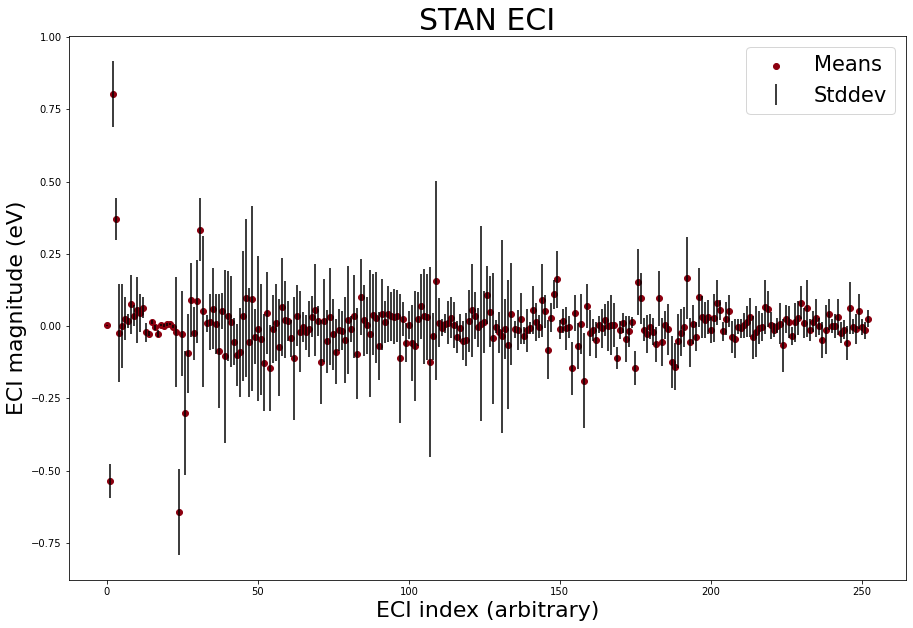

In [14]:
#Display overall plot of ECI and their associated variance:
with open(os.path.join(datafile),'rb') as f:
    eci = np.array(pickle.load(f)['eci'])
fig = cl.plot_eci_uncertainty(eci)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.legend(fontsize=21)
plt.show()

In [15]:
#Tinc stuff to visualize the ECI histograms.
from ipywidgets import Button, HBox, VBox
box = VBox([eci_index.interactive_widget(), eci_index.interactive_control(), graph_buffer.interactive_widget()])
graph_buffer._interactive_widget.width = "80%"
box